Unsupervised Learning
> Harsanjam Saini

## Introduction

---

The Project is divided into four parts, with the goal of implementing unsupervised learning algorithms from scratch. The 3 algorithms implemented in this lab include K-Means, Nearest-Neighbour and DBSAN clustering.

* Dataset 1 consists of eight data points with their corresponding Euclidean distance matrix.
* Dataset 2 contains retrospective samples of males in a heart-disease high-risk region of the Western Cape, South Africa, with various health-related variables.


In [ ]:
import pandas as pd
import numpy as np
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
import time
import random
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN

## Part A:

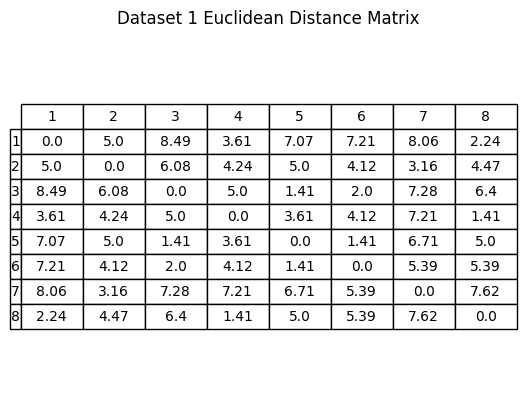

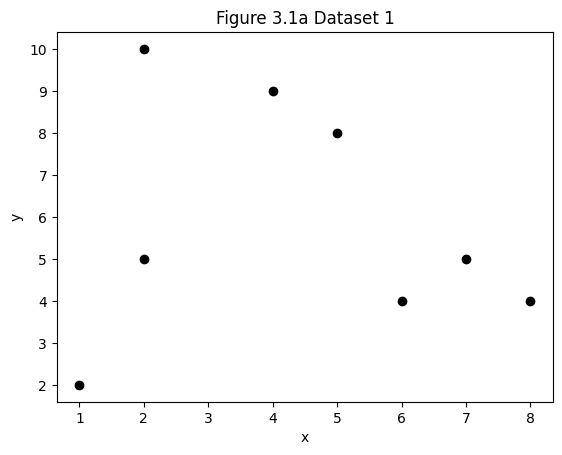

In [ ]:
dataset_1 = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

distance_matrix = np.sqrt(np.sum((dataset_1[:, np.newaxis] - dataset_1) ** 2, axis=-1))

fig, ax = plt.subplots()
table = ax.table(cellText=np.round(distance_matrix, decimals=2),
                 cellLoc='center',
                 colLabels=list(range(1, 9)),
                 rowLabels=list(range(1, 9)), loc='center')
table.scale(1, 1.5)
ax.axis('off')
plt.title('Dataset 1 Euclidean Distance Matrix')
plt.show()

print()
points = np.array([[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4,9]])
plt.scatter(points[:, 0], points[:, 1], c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 3.1a Dataset 1')
plt.show()

In [ ]:
dataset_1 = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
init_centers = np.array([dataset_1[1], dataset_1[2], dataset_1[7]])

def k_means(data, centers):
  clusters = [[] for _ in range(len(centers))]
  for inst in data:
    distances = [np.linalg.norm(inst - center) for center in centers]
    nearest_center = np.argmin(distances)
    clusters[nearest_center].append(inst)

  centers = [np.mean(cluster, axis=0) for cluster in clusters]

  return clusters, centers


clusters, centers = k_means(dataset_1, init_centers)
k_mean_d1 = [clusters, centers]

## Q1: The new clusters after 1 epoch

In [ ]:
for i, cluster in enumerate(clusters):
  print(f"Cluster {i+1}: {cluster}")

Cluster 1: [array([2, 5]), array([1, 2])]
Cluster 2: [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster 3: [array([ 2, 10]), array([5, 8]), array([4, 9])]


## Q2: The new centers of the clusters after 1 epoch

In [ ]:
for i, center in enumerate(centers):
  print(f"Cluster {i+1} center: ({center[0]:.2f}, {center[1]:.2f})")

Cluster 1 center: (1.50, 3.50)
Cluster 2 center: (7.00, 4.33)
Cluster 3 center: (3.67, 9.00)


### Q3: Plot a 10 by 10 space with all the 8 points and show the clusters after the first epoch

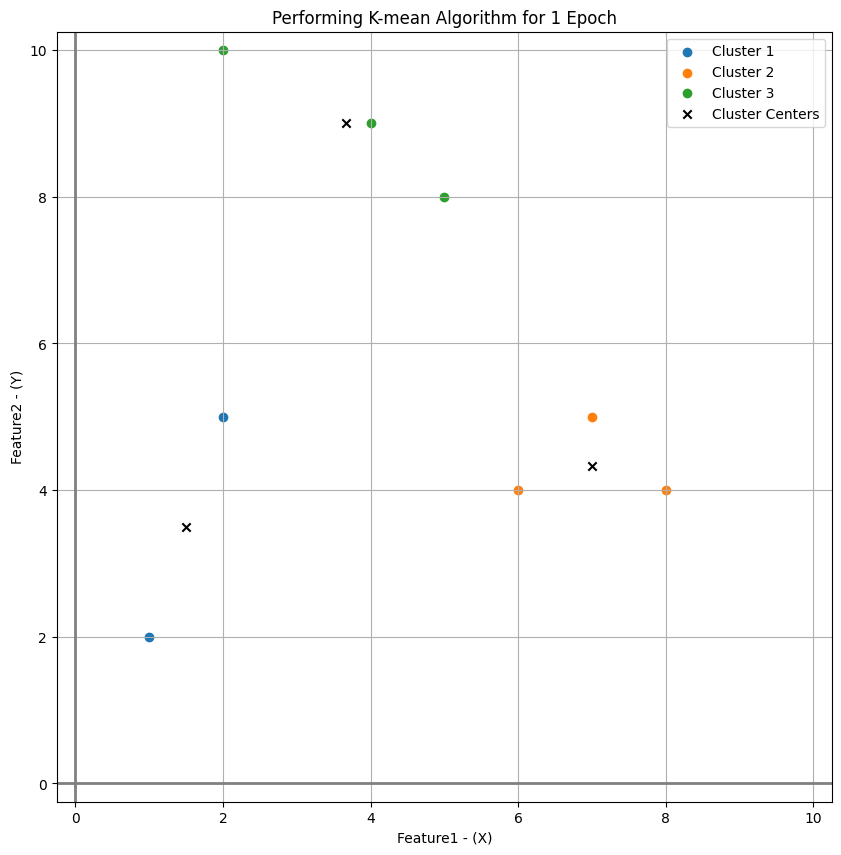

In [ ]:
centers = np.array(centers)
plt.figure(figsize=(10,10))
for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")


plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label="Cluster Centers")
plt.xlabel("Feature1 - (X)")
plt.ylabel("Feature2 - (Y)")
plt.title("Performing K-mean Algorithm for 1 Epoch")
plt.axhline(0, color='grey', linewidth=2)
plt.axvline(0, color='grey', linewidth=2)
plt.xlim(-0.25,10.25)
plt.ylim(-0.25,10.25)
plt.legend()
plt.grid(True)
plt.show()

## Q4. How many are more iterations needed to converge? Draw the result for each epoch

Given that there are only $8$ data points and the clusters are easily distinguishable, running $1$ epoch would be sufficient to achieve convergence.

## Q5: Based on the answer how many epochs for convergence and present a final cluster plot.

Based on the figure below, even after running $5$ epochs, the location of the center points for each cluster doesnt change after the 1st epoch.

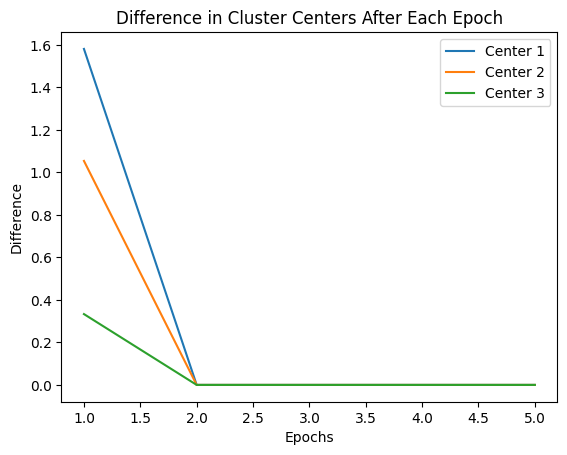

In [ ]:
epochs = 5
center_diff = [[] for _ in range(len(init_centers))]
previous_centers = init_centers.copy()

for _ in range(epochs):
    cluster, centers = k_means(dataset_1, init_centers)

    for i in range(len(centers)):
        diff = np.linalg.norm(centers[i] - previous_centers[i])
        center_diff[i].append(diff)

    previous_centers = centers.copy()

for i in range(len(init_centers)):
  plt.plot(range(1, epochs+1), center_diff[i], label=f"Center {i+1}")

plt.xlabel("Epochs")
plt.ylabel("Difference")
plt.title("Difference in Cluster Centers After Each Epoch")
plt.legend()
plt.show()

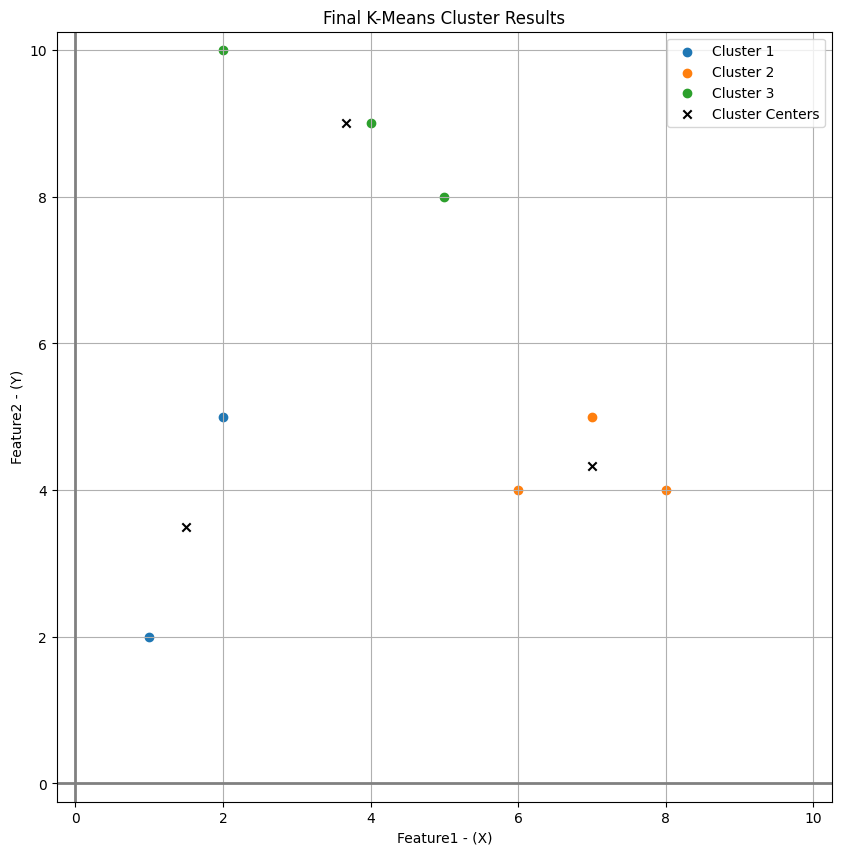

In [ ]:
centers = np.array(centers)
plt.figure(figsize=(10,10))
for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")


plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label="Cluster Centers")
plt.xlabel("Feature1 - (X)")
plt.ylabel("Feature2 - (Y)")
plt.title("Final K-Means Cluster Results")
plt.axhline(0, color='grey', linewidth=2)
plt.axvline(0, color='grey', linewidth=2)
plt.xlim(-0.25,10.25)
plt.ylim(-0.25,10.25)
plt.legend()
plt.grid(True)
plt.show()

### Conducting K-means Algorithm of Dataset #2

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv", sep=",")
dataset = dataset[['tobacco','sbp', 'chd']]
print("Physical System's Database:")
print(dataset)

train_data = dataset[:300]
test_data = dataset[300:]

train_features = train_data[['sbp', 'tobacco']]
test_features = test_data[['sbp', 'tobacco']]

print(f"Train Features:\n{train_features}")
print(f"Test Features:\n{test_features}")

Physical System's Database:
     tobacco  sbp  chd
0      12.00  160    1
1       0.01  144    1
2       0.08  118    0
3       7.50  170    1
4      13.60  134    1
..       ...  ...  ...
457     0.40  214    0
458     4.20  182    1
459     3.00  108    0
460     5.40  118    0
461     0.00  132    1

[462 rows x 3 columns]
Train Features:
     sbp  tobacco
0    160    12.00
1    144     0.01
2    118     0.08
3    170     7.50
4    134    13.60
..   ...      ...
295  142     0.00
296  132     0.10
297  136     0.00
298  132    12.00
299  166     4.10

[300 rows x 2 columns]
Test Features:
     sbp  tobacco
300  138     0.00
301  138     2.27
302  170     0.00
303  128     0.00
304  136     1.20
..   ...      ...
457  214     0.40
458  182     4.20
459  108     3.00
460  118     5.40
461  132     0.00

[162 rows x 2 columns]


In [ ]:
centers = np.array([[120, 5], [140, 10]])
for _ in range(epochs):
  clusters, centers = k_means(train_features.values, centers)
k_mean_d2 = [clusters, centers]

test_labels = []

for inst in test_features.values:
  distances = [np.linalg.norm(inst - center) for center in centers]
  nearest_center = np.argmin(distances)
  test_labels.append(nearest_center)


## Q6: Provide Accuracy for Dataset 2

In [ ]:
actual_labels = test_data['chd']
accuracy = accuracy_score(actual_labels, test_labels)
accuracy = round(accuracy*100, 2)
print(f"Dataset 2 Accuracy = {accuracy}%")

Dataset 2 Accuracy = 67.28%


### Q7: Plot ’sbp’ vs ’tobacco’ and represent the actual data points with different color to show the two classes. Hint: you may have to convert the labels from categorical to numeric values to plot

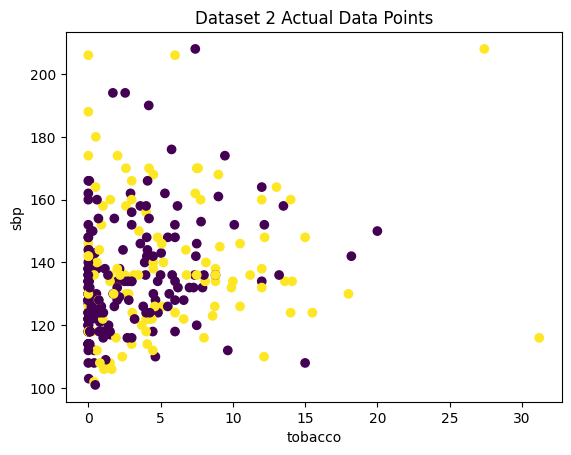

In [ ]:
plt.scatter(train_features['tobacco'],train_features['sbp'], c=train_data['chd'])
plt.ylabel('sbp')
plt.xlabel('tobacco')
plt.title('Dataset 2 Actual Data Points')
plt.show()

### Q8: Plot ’sbp’ vs ’tobacco’ and represent the predicted data points with different color to show the two classes. Hint: you may have to convert the labels from categorical to numeric values to plot.


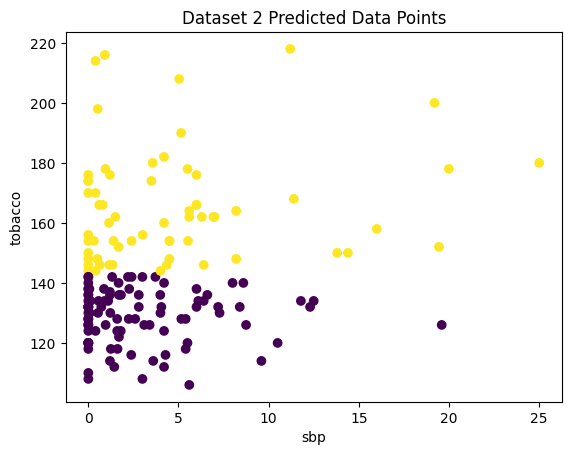

In [ ]:
plt.scatter(test_features['tobacco'], test_features['sbp'], c=test_labels)
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Dataset 2 Predicted Data Points')
plt.show()

## Part B:

In [ ]:
dataset_1 = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
distance_matrix = np.sqrt(np.sum((dataset_1[:, np.newaxis] - dataset_1) ** 2, axis=-1))


def nearest_neighbor(data, dist):
  clusters = []
  centers = []

  for i, instance in enumerate(data):
    assigned = False

    for j, center in enumerate(centers):
      distance = dist[i][j]
      if distance <= 4:
        clusters[j].append(instance)
        assigned = True
        break

    if not assigned:
      new_cluster = [instance]
      clusters.append(new_cluster)
      centers.append(instance)

  return clusters, centers

clusters, centers = nearest_neighbor(dataset_1, distance_matrix)
nn_d1 = [clusters, centers]

In [ ]:
for i, cluster in enumerate(clusters):
  print(f"Cluster {i+1}: {cluster}")

Cluster 1: [array([ 2, 10]), array([5, 8]), array([4, 9])]
Cluster 2: [array([2, 5]), array([1, 2])]
Cluster 3: [array([8, 4]), array([7, 5]), array([6, 4])]


In [ ]:
for i, center in enumerate(centers):
  print(f"Cluster {i+1} center: ({center[0]:.2f}, {center[1]:.2f})")

Cluster 1 center: (2.00, 10.00)
Cluster 2 center: (2.00, 5.00)
Cluster 3 center: (8.00, 4.00)


## Q9: Have you got the same results as you got using K-Means?

Yes, the results obtained using k-means and the nearest neighbor clustering algorithm are the same. While the nearest neighbor algorithm started off with one cluster, after iterating through all instances, it resulted in three clusters at a threshold value of $4$.

## Q10: Give the final plot for NN clustering

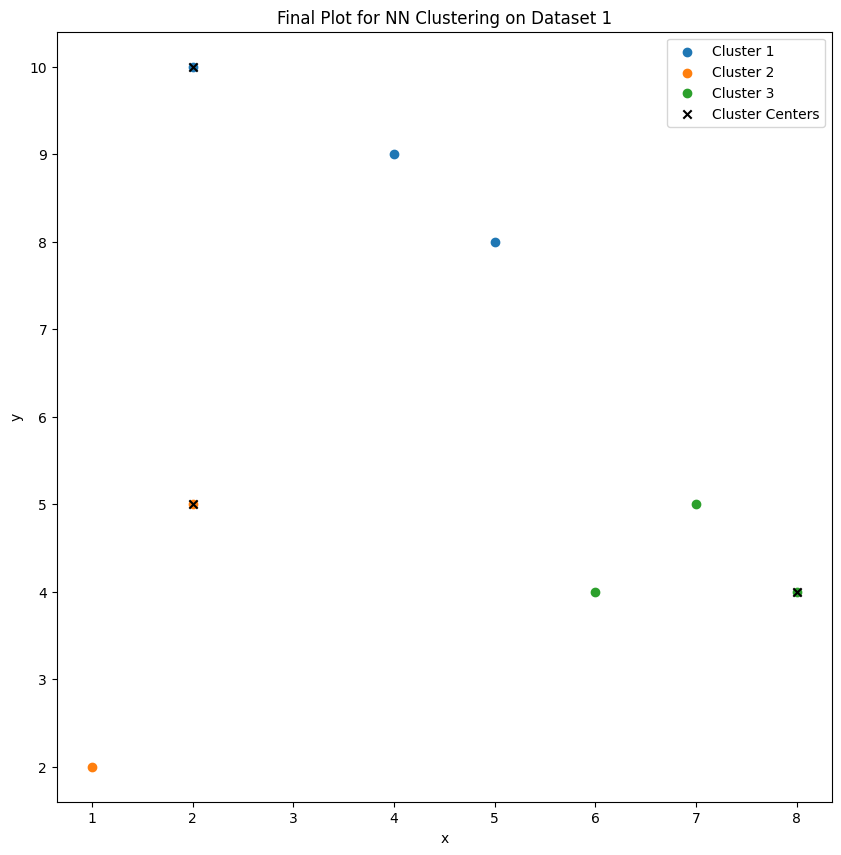

In [ ]:
centers = np.array(centers)
plt.figure(figsize=(10, 10))
for i, cluster in enumerate(clusters):
  cluster_points = np.array(cluster)
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")

plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label="Cluster Centers")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Final Plot for NN Clustering on Dataset 1")
plt.legend()
plt.show()

### Q11 Results

Given that the Nearest Neighbor clustering algorithm requires only one iteration to assign each instance to the nearest cluster, it should perform better in terms of computational time. Regarding the disadvantages on bigger datasets:

For k-means, due to the initial selection of cluster, determining the optimal number of clusters becomes more challenging.
For nearest neighbor, it requires computing the distances between each instances leading to increased time and memory requirements.

### Q12 Results: Provide the Accuracy of NN Clustring on Dataset 2

In [ ]:
train_data = dataset[:300]
test_data = dataset[300:]

D_train = train_data[["sbp", "tobacco"]].values
D_test = test_data[["sbp", "tobacco"]].values

distance_matrix2 = np.sqrt(np.sum((D_train[:, np.newaxis] - D_train) ** 2, axis=2))

clusters, centers = nearest_neighbor(D_train, distance_matrix2)
nn_d2 = [clusters, centers]

test_labels = []

for inst in test_features.values:
  distances = [np.linalg.norm(inst - center) for center in centers]
  nearest_center = np.argmin(distances)
  test_labels.append(nearest_center)

actual_labels = test_data['chd']
accuracy = accuracy_score(actual_labels, test_labels)
accuracy = round(accuracy*100, 2)
print(f"Dataset 2 Accuracy = {accuracy}%")

Dataset 2 Accuracy = 2.47%


## Part C:

### Question 13 Result

In [ ]:
def findEuclideanDistance(point: list, cluster_center: list) -> float:
    distanceSquared = ((cluster_center[0]-point[0])**2)+((cluster_center[1]-point[1])**2)
    distance = mth.sqrt(distanceSquared)
    return distance

def region_query(data, point_index, eps):
   # Find all points in the dataset within the epsilon neighborhood of a given point.
    neighbors = []
    for i, point in enumerate(data):
        if findEuclideanDistance(data[point_index], point) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, point_index, neighbors, cluster_id, eps, min_samples, clusters, visited):

    # Recursive function to expand a clusters
    clusters[cluster_id].append(point_index)
    visited.add(point_index)
    for neighbor_index in neighbors:
        if neighbor_index not in visited:
            visited.add(neighbor_index)
            neighbor_neighbors = region_query(data, neighbor_index, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors.extend(neighbor_neighbors)
        if neighbor_index not in [p for cluster in clusters.values() for p in cluster]:
            clusters[cluster_id].append(neighbor_index)

def dbscan(data, eps, min_samples):
    # Perform DBSCAN clustering on the given data.

    clusters = {}
    cluster_id = 0
    visited = set()

    for point_index, point in enumerate(data):
        if point_index not in visited:
            visited.add(point_index)
            neighbors = region_query(data, point_index, eps)
            if len(neighbors) < min_samples:
                continue
            cluster_id += 1
            clusters[cluster_id] = []
            expand_cluster(data, point_index, neighbors, cluster_id, eps, min_samples, clusters, visited)

    return clusters


def region_query(data, point_index, eps):
   # Find all points in the dataset within the epsilon neighborhood of a given point.
    neighbors = []
    for i, point in enumerate(data):
        if findEuclideanDistance(data[point_index], point) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, point_index, neighbors, cluster_id, eps, min_samples, clusters, visited):

    # Recursive function to expand a clusters
    clusters[cluster_id].append(point_index)
    visited.add(point_index)
    for neighbor_index in neighbors:
        if neighbor_index not in visited:
            visited.add(neighbor_index)
            neighbor_neighbors = region_query(data, neighbor_index, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors.extend(neighbor_neighbors)
        if neighbor_index not in [p for cluster in clusters.values() for p in cluster]:
            clusters[cluster_id].append(neighbor_index)

def dbscan(data, eps, min_samples):
    # Perform DBSCAN clustering on the given data.

    clusters = {}
    cluster_id = 0
    visited = set()

    for point_index, point in enumerate(data):
        if point_index not in visited:
            visited.add(point_index)
            neighbors = region_query(data, point_index, eps)
            if len(neighbors) < min_samples:
                continue
            cluster_id += 1
            clusters[cluster_id] = []
            expand_cluster(data, point_index, neighbors, cluster_id, eps, min_samples, clusters, visited)

    return clusters

Physical System's Database:
    X   Y
A1  2  10
A2  2   5
A3  8   4
A4  5   8
A5  7   5
A6  6   4
A7  1   2
A8  4   9
{1: [2, 4, 5], 2: [3, 7]}


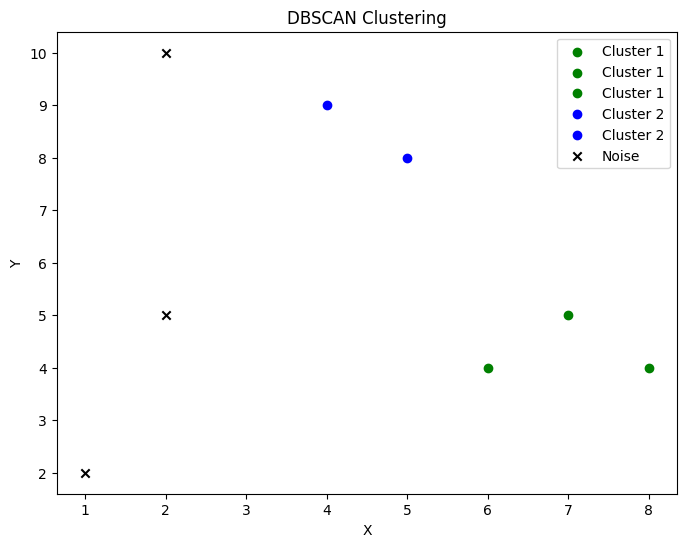

In [ ]:
# Define the database
points = [[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]
point_name = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
database = pd.DataFrame(points, columns=['X', 'Y'], index=point_name)
print("Physical System's Database:")
print(database)

# Perform DBSCAN clustering
eps = 2  # maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 2  # the number of samples in a neighborhood for a point to be considered as a core point
data = database.values
clusters = dbscan(data, eps, min_samples)

print(clusters)

# Visualize the clusters and noise points
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for cluster_id, points_indices in clusters.items():
    cluster_color = colors[cluster_id % len(colors)]
    for point_index in points_indices:
        plt.scatter(data[point_index][0], data[point_index][1], c=cluster_color, label=f'Cluster {cluster_id}')

# Display points not assigned to any cluster (noise points)
noise_points = [point_index for point_index in range(len(data)) if point_index not in [p for cluster in clusters.values() for p in cluster]]
if len(noise_points) > 0:
    plt.scatter(data[noise_points][:, 0], data[noise_points][:, 1], c='k', marker='x', label='Noise')


plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


### Question 14 Result:

Physical System's Database:
    X   Y
A1  2  10
A2  2   5
A3  8   4
A4  5   8
A5  7   5
A6  6   4
A7  1   2
A8  4   9


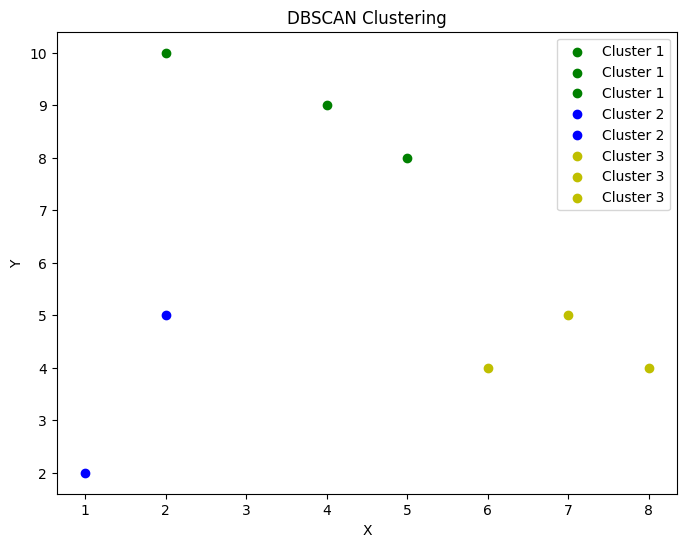

In [ ]:
# Define the database
points = [[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]
point_name = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
database = pd.DataFrame(points, columns=['X', 'Y'], index=point_name)
print("Physical System's Database:")
print(database)

# Perform DBSCAN clustering
eps = mth.sqrt(10)  # maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 2  # the number of samples in a neighborhood for a point to be considered as a core point
data = database.values
clusters = dbscan(data, eps, min_samples)

# Visualize the clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for cluster_id, points_indices in clusters.items():
    cluster_color = colors[cluster_id % len(colors)]
    for point_index in points_indices:
        plt.scatter(data[point_index][0], data[point_index][1], c=cluster_color, label=f'Cluster {cluster_id}')

noise_points = [point_index for point_index in range(len(data)) if point_index not in [p for cluster in clusters.values() for p in cluster]]
if len(noise_points) > 0:
    plt.scatter(data[noise_points][:, 0], data[noise_points][:, 1], c='k', marker='x', label='Noise')

plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


## NOTE: I don't know what is going on with DBSCAN for Dataset #2.

### Question 15 Result

Physical System's Database:
     tobacco  sbp
0      12.00  160
1       0.01  144
2       0.08  118
3       7.50  170
4      13.60  134
..       ...  ...
457     0.40  214
458     4.20  182
459     3.00  108
460     5.40  118
461     0.00  132

[462 rows x 2 columns]
[[12.0, 160.0], [0.01, 144.0], [0.08, 118.0], [7.5, 170.0], [13.6, 134.0], [6.2, 132.0], [4.05, 142.0], [4.08, 114.0], [0.0, 114.0], [0.0, 132.0], [6.0, 206.0], [14.1, 134.0], [0.0, 118.0], [0.0, 132.0], [9.65, 112.0], [1.53, 117.0], [7.5, 120.0], [10.5, 146.0], [2.6, 158.0], [14.0, 124.0], [1.61, 106.0], [7.9, 132.0], [0.3, 150.0], [0.6, 138.0], [18.2, 142.0], [4.0, 124.0], [6.0, 118.0], [9.1, 145.0], [4.09, 144.0], [0.0, 146.0], [2.52, 136.0], [1.02, 158.0], [6.6, 122.0], [8.75, 126.0], [5.5, 148.0], [4.26, 122.0], [3.9, 140.0], [4.64, 110.0], [0.0, 130.0], [11.2, 136.0], [0.28, 118.0], [0.04, 144.0], [0.0, 120.0], [2.61, 130.0], [0.0, 114.0], [4.65, 128.0], [7.4, 162.0], [1.91, 116.0], [0.0, 114.0], [3.8, 126.0], [0.0, 

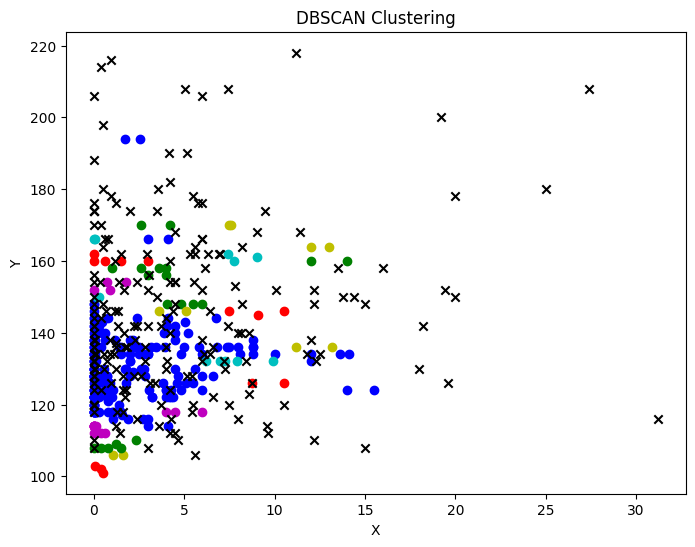

In [ ]:
database = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv", sep=",")
database = database[['tobacco','sbp']]
print("Physical System's Database:")
print(database)

#Splitting the physical system's database into two sets for training and
#testing purposes
database_train = database.iloc[:300]
database_test = database.iloc[300:]

db_train = database_train.values.tolist()
print(db_train)

# Perform DBSCAN clustering
eps = 2  # maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 2  # the number of samples in a neighborhood for a point to be considered as a core point
data = database.values
clusters = dbscan(db_train, eps, min_samples)

print(clusters)

# Visualize the clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for cluster_id, points_indices in clusters.items():
    cluster_color = colors[cluster_id % len(colors)]
    for point_index in points_indices:
        plt.scatter(data[point_index][0], data[point_index][1], c=cluster_color, label=f'Cluster {cluster_id}')

noise_points = [point_index for point_index in range(len(data)) if point_index not in [p for cluster in clusters.values() for p in cluster]]
if len(noise_points) > 0:
    plt.scatter(data[noise_points][:, 0], data[noise_points][:, 1], c='k', marker='x', label='Noise')

plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
database = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv", sep=",")
database = database[['tobacco','sbp','chd']]
print("Physical System's Database:")
print(database)

train_data = database.head(300)
test_data = database.tail(len(database) - 300)

train_labels = []
for cluster_id in dbscan(train_data.values, 10, 5).values():
    train_labels.extend([cluster_id] * len(cluster_id))

test_labels = []
for cluster_id in dbscan(test_data.values, 10, 5).values():
    test_labels.extend([cluster_id] * len(cluster_id))

from sklearn.metrics import accuracy_score

#print("Accuracy: ", accuracy_score(train_labels, test_labels))

Physical System's Database:
     tobacco  sbp  chd
0      12.00  160    1
1       0.01  144    1
2       0.08  118    0
3       7.50  170    1
4      13.60  134    1
..       ...  ...  ...
457     0.40  214    0
458     4.20  182    1
459     3.00  108    0
460     5.40  118    0
461     0.00  132    1

[462 rows x 3 columns]


## Part D:

### Question 16 Dataset1 Results (K-MEANS)

In [ ]:
import sys

dataset_1 = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
init_centers = np.array([dataset_1[1], dataset_1[2], dataset_1[7]])

def k_means(data, centers):
  clusters = [[] for _ in range(len(centers))]
  for inst in data:
    distances = [np.linalg.norm(inst - center) for center in centers]
    nearest_center = np.argmin(distances)
    clusters[nearest_center].append(inst)

  centers = [np.mean(cluster, axis=0) for cluster in clusters]

  return clusters, centers


clusters, centers = k_means(dataset_1, init_centers)
k_mean_d1 = [clusters, centers]

centers = np.array(centers)

print("K-Means Implemented Algorithm")
for i, center in enumerate(centers):
  print(f"Cluster {i+1} center: ({center[0]:.2f}, {center[1]:.2f})")

kmeans_model_d1 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(dataset_1)
kmeans_model_d1.labels_
k_lib_cluster_centers_d1 = kmeans_model_d1.cluster_centers_

print()
print("K-Mean Library Cluster Centers:")
np.savetxt(sys.stdout, k_lib_cluster_centers_d1, fmt='%.2f')


K-Means Implemented Algorithm
Cluster 1 center: (1.50, 3.50)
Cluster 2 center: (7.00, 4.33)
Cluster 3 center: (3.67, 9.00)

K-Mean Library Cluster Centers:
7.00 4.33
3.67 9.00
1.50 3.50


### Question 16 Dataset2 Results (K-MEANS)

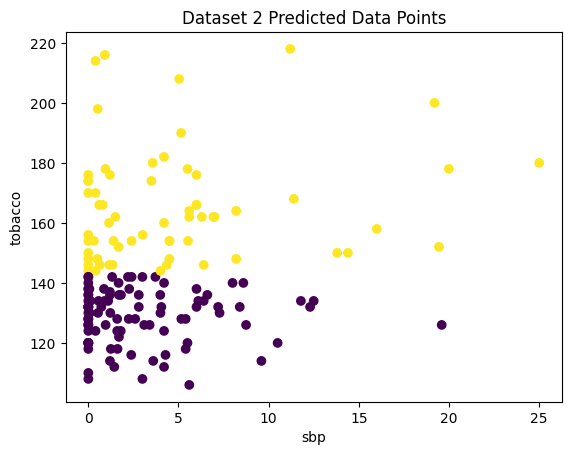

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


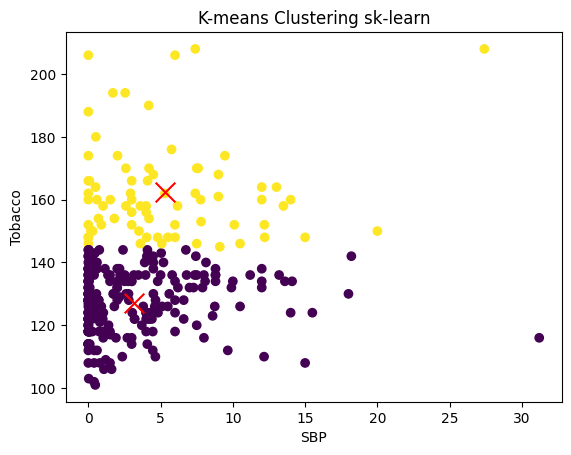

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv", sep=",")
dataset = dataset[['tobacco','sbp', 'chd']]

train_data = dataset[:300]
test_data = dataset[300:]

train_features = train_data[['sbp', 'tobacco']]
test_features = test_data[['sbp', 'tobacco']]

centers = np.array([[120, 5], [140, 10]])
for _ in range(epochs):
  clusters, centers = k_means(train_features.values, centers)
k_mean_d2 = [clusters, centers]

test_labels = []

for inst in test_features.values:
  distances = [np.linalg.norm(inst - center) for center in centers]
  nearest_center = np.argmin(distances)
  test_labels.append(nearest_center)

plt.scatter(test_features['tobacco'], test_features['sbp'], c=test_labels)
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Dataset 2 Predicted Data Points')
plt.show()

# Perform k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_features)

# Getting the centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.scatter(train_features['tobacco'], train_features['sbp'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=200)
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.title('K-means Clustering sk-learn')
plt.show()


### Question 16 Dataset1 Result (NN-CLUSTERING)

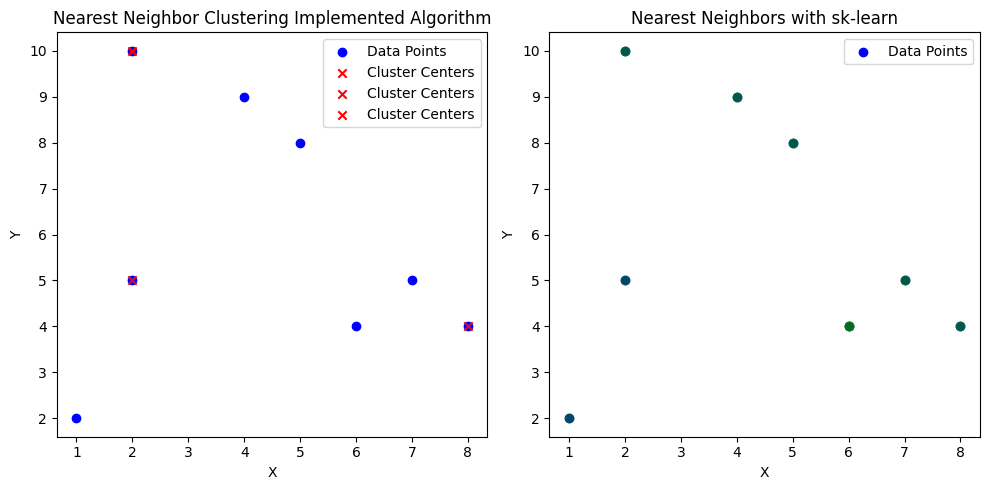

In [ ]:
# Given dataset
dataset_1 = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Function to calculate distance matrix
def calculate_distance_matrix(data):
    return np.sqrt(np.sum((data[:, np.newaxis] - data) ** 2, axis=-1))

# Function for nearest neighbor clustering
def nearest_neighbor(data, dist):
    clusters = []
    centers = []

    for i, instance in enumerate(data):
        assigned = False

        for j, center in enumerate(centers):
            distance = dist[i][j]
            if distance <= 4:
                clusters[j].append(instance)
                assigned = True
                break

        if not assigned:
            new_cluster = [instance]
            clusters.append(new_cluster)
            centers.append(instance)

    return clusters, centers

# Calculate distance matrix
distance_matrix = calculate_distance_matrix(dataset_1)

# Perform nearest neighbor clustering
clusters, centers = nearest_neighbor(dataset_1, distance_matrix)
nn_d1 = [clusters, centers]

# Plotting nearest neighbor clustering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(dataset_1[:,0], dataset_1[:,1], color='blue', label='Data Points')
for center in centers:
    plt.scatter(center[0], center[1], color='red', marker='x', label='Cluster Centers')
plt.title('Nearest Neighbor Clustering Implemented Algorithm')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Using NearestNeighbors from sklearn
NN = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(dataset_1)

# Plotting NearestNeighbors
plt.subplot(1, 2, 2)
distances, indices = NN.kneighbors(dataset_1)
plt.scatter(dataset_1[:,0], dataset_1[:,1], color='blue', label='Data Points')
for i in range(len(dataset_1)):
    plt.scatter(dataset_1[indices[i], 0], dataset_1[indices[i], 1], color='green', alpha=0.3)
plt.title('Nearest Neighbors with sk-learn')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

### Question 16 Dataset2 Result (NN-CLUSTERING)

In [ ]:
database = pd.read_csv("https://raw.githubusercontent.com/yoga-suhas-km/Intelligent_systems/main/heart_dataset.csv", sep=",")
database = database[['tobacco','sbp','chd']]
#Splitting the physical system's database into two sets for training and
#testing purposes
database_train = database.iloc[:300]
database_test = database.iloc[300:]
db_train = database_train.values.tolist()
db_test = database_test.values.tolist()


NN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(database_train)
print("Sparce Matrix obtained using Scikit-Learn for Dataset2 (NN Algorithm):")
scikit_matrix = NN.kneighbors_graph(database_train).toarray()
print(scikit_matrix)


sparce_matrix = np.zeros((database_train.shape[0], database_train.shape[0]))
for cluster in PerformNN(db_train)[0]:
    for i in range(len(cluster)):
        for j in range(len(cluster)):
            row_i = np.where(np.all(database_train == cluster[i], axis=1))[0][0]
            column_j = np.where(np.all(database_train == cluster[j], axis=1))[0][0]
            sparce_matrix[row_i, column_j] = 1

print("\nSparse Matrix obtained for Dataset2 (NN Algorithm):\n{0}".format(sparce_matrix))

print("\n\n    -------------------------------------------------     ")
print("\nThe above two sparce matrices AREN'T identical, but have an accuracy of {0}".format(np.round(np.mean(np.equal(scikit_matrix, sparce_matrix)),4)))


### Question 16 Dataset1 Result (DBSCAN)

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

# Define the dataset
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9], [5, 2], [6, 3]])


print("-----------------------------------------")
print("Apply DBSCAN for (eps=2, min_samples=2)")
print("-----------------------------------------")

# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=2, min_samples=2).fit(X)
labels = db.labels_


# Print the clusters and the noise points

print("Cluster labels:", labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

for i in set(labels):
    print("Cluster", i+1, ":", X[labels == i])

print("Noise points:", X[labels == -1])

print("-----------------------------------------------")
print("Apply DBSCAN for (eps=sqrt(10), min_samples=2)")
print("-----------------------------------------------")

# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=np.sqrt(10), min_samples=2).fit(X)
labels = db.labels_

# Print the clusters and the noise points

print("Cluster labels:", labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

for i in set(labels):
    print("Cluster", i+1, ":", X[labels == i])

print("Noise points:", X[labels == -1])

### Question 16 Dataset2 Result (DBSCAN)

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

database = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv", sep=",")
database = database[['tobacco','sbp']]
print("Physical System's Database:")
print(database)

#Splitting the physical system's database into two sets for training and
#testing purposes
database_train = database.iloc[:300]
database_test = database.iloc[300:]

db_train = database_train.values.tolist()

# Define the dataset
X = db_train


print("-----------------------------------------")
print("Apply DBSCAN for (eps=2, min_samples=2)")
print("-----------------------------------------")

# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=2, min_samples=2).fit(X)
labels = db.labels_


# Print the clusters and the noise points

print("Cluster labels:", labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

for i in set(labels):
    print("Cluster", i+1, ":", X[labels == i])

print("Noise points:", X[labels == -1])

print("-----------------------------------------------")
print("Apply DBSCAN for (eps=sqrt(10), min_samples=2)")
print("-----------------------------------------------")

# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=np.sqrt(10), min_samples=2).fit(X)
labels = db.labels_

# Print the clusters and the noise points

print("Cluster labels:", labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

for i in set(labels):
    print("Cluster", i+1, ":", X[labels == i])

print("Noise points:", X[labels == -1])